In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
holiday_package = pd.read_csv(r'Holiday_Package.csv')

In [54]:
df_2 = holiday_package.copy()
df_2.drop(columns='Unnamed: 0', inplace=True)
df_2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [55]:
print('No. of Columns', df_2.shape[1])
print('No. of Rows', df_2.shape[0])

No. of Columns 7
No. of Rows 872


In [56]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [57]:
df_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
check_null = df_2.isnull().sum().any()
if check_null == True:
    print('Dataset has', df_2.isnull().sum().sum(), 'Null values\n')
    print(df_2.isnull().sum())
else:
    print('There are no Null values in the dataset')

There are no Null values in the dataset


In [59]:
for item in df_2.columns:
    print(item)

Holliday_Package
Salary
age
educ
no_young_children
no_older_children
foreign


In [60]:
df_2.columns = df_2.columns.str.lower()
df_2.columns = df_2.columns.str.replace(' ', '_')

In [61]:
df_2.rename(columns={
    'holliday_package': 'holiday_package',
    'educ': 'education',
    'foreign': 'foreigner'
}, inplace=True)

In [62]:
for item in df_2.columns:
    print(item)

holiday_package
salary
age
education
no_young_children
no_older_children
foreigner


In [63]:
check_dups = df_2.duplicated().sum().any()
if check_dups == True:
    print('Dataset has', df_2.duplicated().sum(), 'Duplicate rows\n')
    print(df_2[df_2.duplicated()], '\n')
    df_2.drop_duplicates(inplace=True)
    print('Dropping all Duplicates from the dataset\nDuplicate count =', df_2.duplicated().sum())
else:
    print('There are no Duplicates in the dataset')

There are no Duplicates in the dataset


In [64]:
cat = []
nums = []

for i in df_2.columns:
    if df_2[i].dtype == 'object':
        cat.append(i)
    else:
        nums.append(i)
        
df_2_cat = df_2[cat]
df_2_nums = df_2[nums]

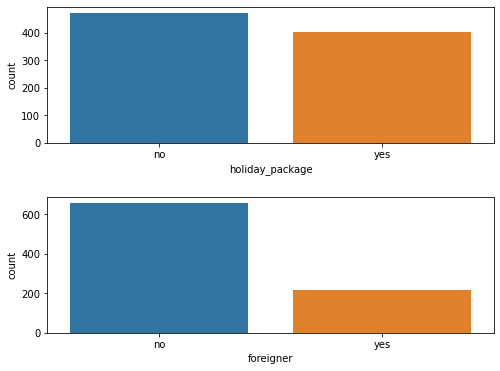

In [65]:
fig, axes = plt.subplots(nrows=len(df_2_cat.columns), ncols=1, figsize=(8,6))
for i in range(0, len(df_2_cat.columns)):
    sns.countplot(df_2_cat[df_2_cat.columns[i]], label=df_2_cat.columns[i], ax=axes[i])

plt.subplots_adjust(hspace=0.4)

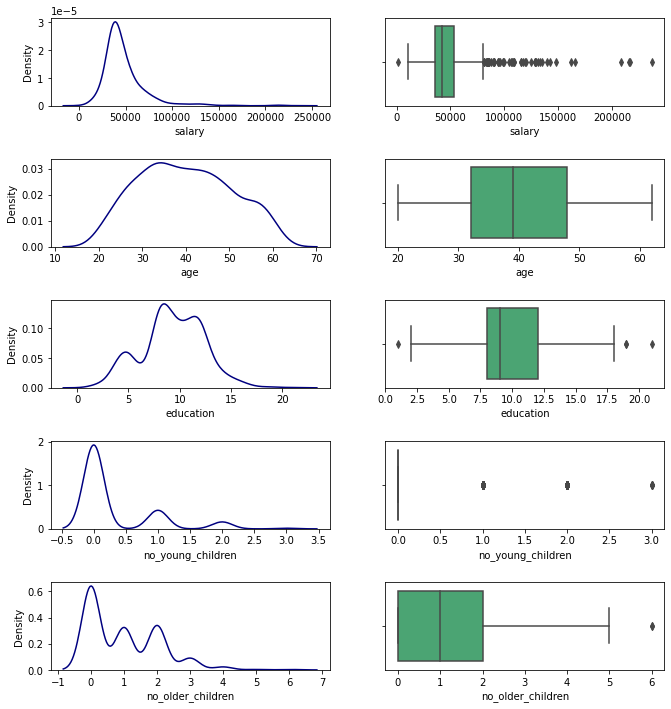

In [66]:
fig, axes = plt.subplots(nrows=len(df_2_nums.columns), ncols=2, figsize=(11,12))
for i in range(0, len(df_2_nums.columns)):
    sns.kdeplot(df_2_nums[df_2_nums.columns[i]], label=df_2_nums.columns[i], ax=axes[i][0], color='navy')
    sns.boxplot(df_2_nums[df_2_nums.columns[i]], ax=axes[i][1], color='mediumseagreen')

plt.subplots_adjust(hspace=0.6)

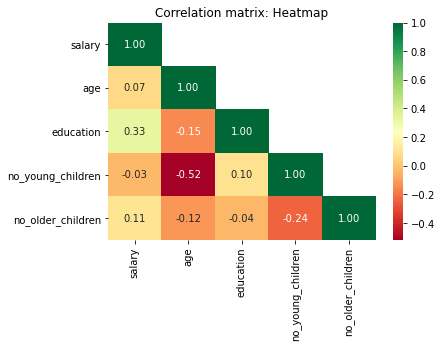

In [67]:
sns.heatmap(df_2.corr(), cmap='RdYlGn', fmt='.2f', annot=True, mask=np.triu(df_2.corr(),+1))
plt.title('Correlation matrix: Heatmap');

<Figure size 432x288 with 0 Axes>

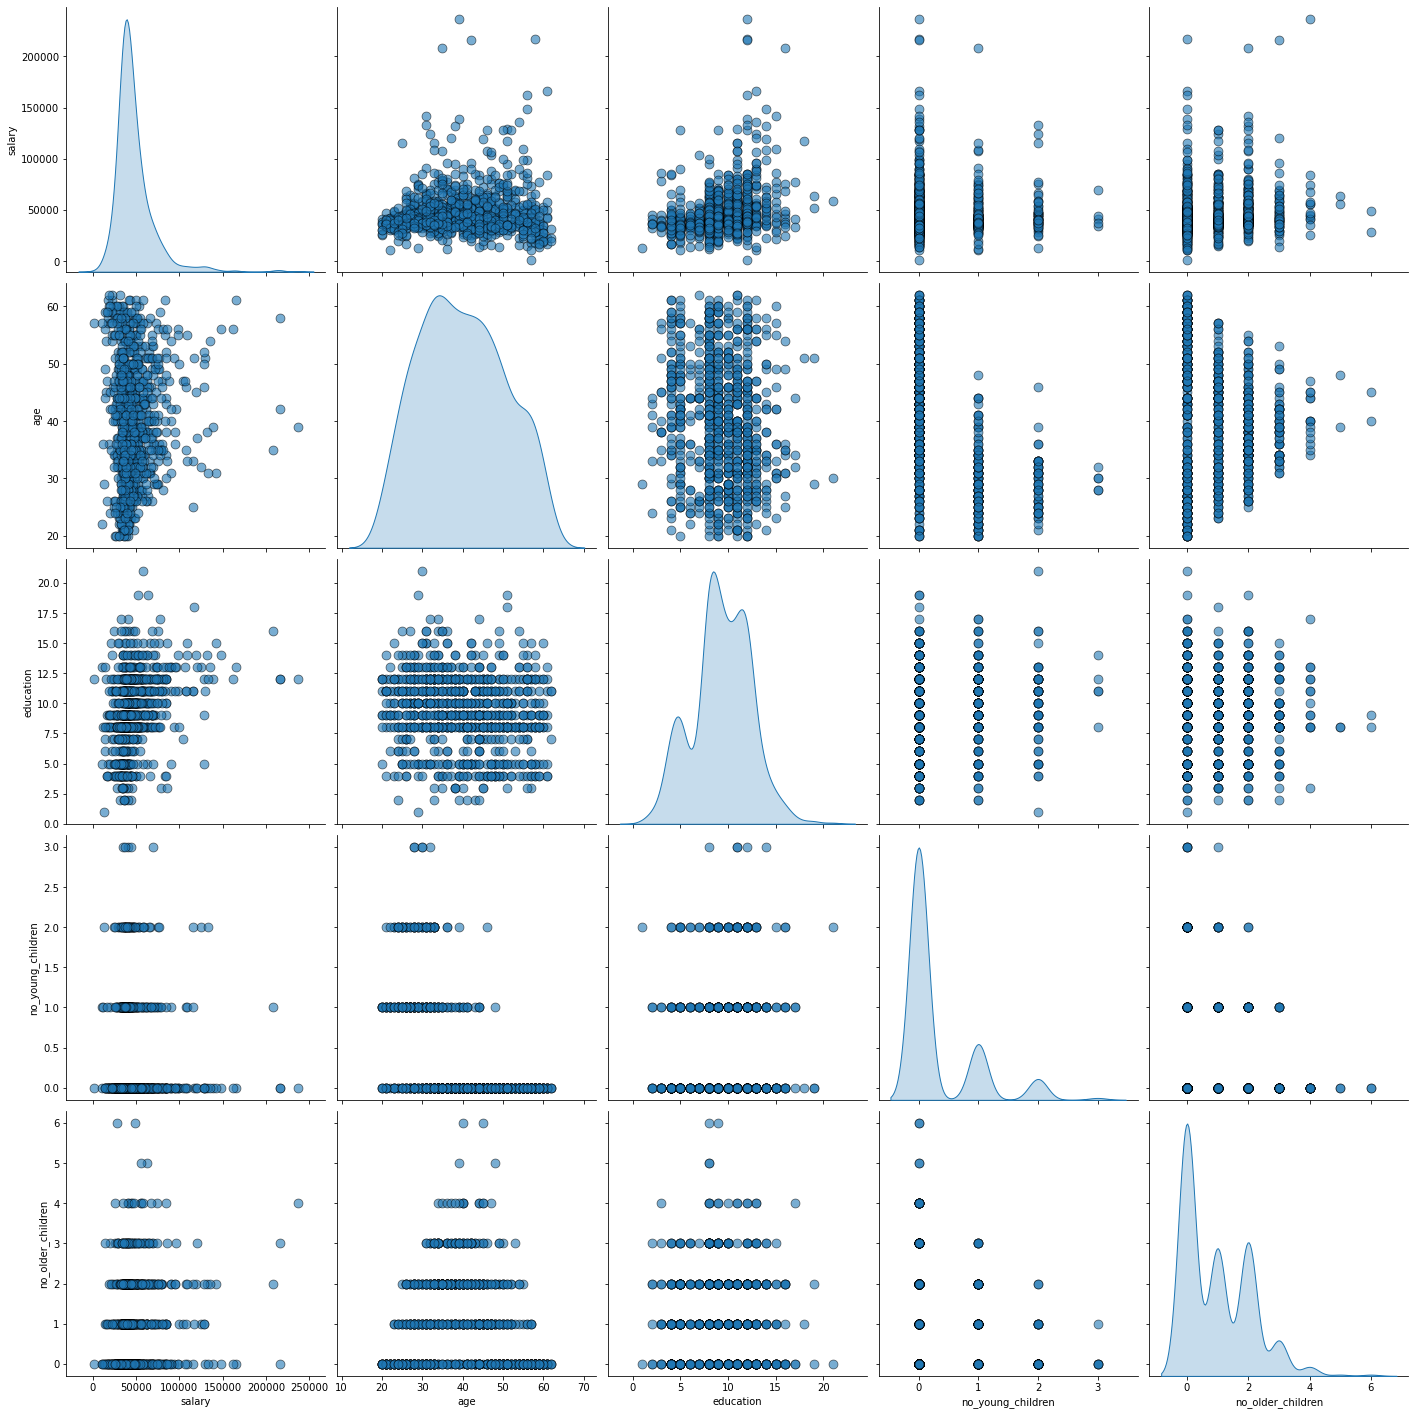

In [68]:
plt.suptitle('Pair Plot of ', size = 18);

sns.pairplot(
    df_2,
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    size = 4
);

In [69]:
for column in df_2[['holiday_package', 'foreigner']]:
    print('Unique values in', column, 'column are', df_2[column].unique())

Unique values in holiday_package column are ['no' 'yes']
Unique values in foreigner column are ['no' 'yes']


In [70]:
df_2['holiday_package'] = np.where(df_2['holiday_package']=='no', '0', df_2['holiday_package'])
df_2['holiday_package'] = np.where(df_2['holiday_package']=='yes', '1', df_2['holiday_package'])

df_2['foreigner'] = np.where(df_2['foreigner']=='no', '0', df_2['foreigner'])
df_2['foreigner'] = np.where(df_2['foreigner']=='yes', '1', df_2['foreigner'])

In [71]:
for column in df_2[['holiday_package', 'foreigner']]:
    print('Unique values in', column, 'column are', df_2[column].unique())

Unique values in holiday_package column are ['0' '1']
Unique values in foreigner column are ['0' '1']


In [72]:
df_2.dtypes

holiday_package      object
salary                int64
age                   int64
education             int64
no_young_children     int64
no_older_children     int64
foreigner            object
dtype: object

In [73]:
df_2['holiday_package'] = pd.to_numeric(df_2['holiday_package']).astype(np.int64)
df_2['foreigner'] = pd.to_numeric(df_2['foreigner']).astype(np.int64)

In [74]:
df_2.dtypes

holiday_package      int64
salary               int64
age                  int64
education            int64
no_young_children    int64
no_older_children    int64
foreigner            int64
dtype: object

In [75]:
# fig, axes = plt.subplots(nrows=len(df_2.columns), ncols=2, figsize=(11,18))

# for i in range(0, len(df_2.columns)):
#     sns.kdeplot(df_2[df_2.columns[i]], label=df_2.columns[i], ax=axes[i][0], color='navy')
#     sns.boxplot(df_2[df_2.columns[i]], ax=axes[i][1], color='mediumseagreen')
    
# plt.subplots_adjust(hspace=0.6)

In [76]:
X = df_2.drop('holiday_package', axis=1)
y = df_2[['holiday_package']]
X.head()

,salary,age,education,no_young_children,no_older_children,foreigner
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=1, stratify=df_2['holiday_package'])

In [78]:
# Checking dimensions on the train and test data

print('X_train :: Columns = {}, Rows = {}'.format(X_train.shape[1], X_train.shape[0]))
print('X_test :: Columns = {}, Rows = {}'.format(X_test.shape[1], X_test.shape[0]))
print('Y_train :: Columns = {}, Rows = {}'.format(y_train.shape[1], y_train.shape[0]))
print('Y_test :: Columns = {}, Rows = {}'.format(y_test.shape[1], y_test.shape[0]))

X_train :: Columns = 6, Rows = 610
X_test :: Columns = 6, Rows = 262
Y_train :: Columns = 1, Rows = 610
Y_test :: Columns = 1, Rows = 262


In [79]:
print('Valuecounts of Train data')
print(y_train.value_counts(normalize=True), '\n')
print('Valuecounts of Test data')
print(y_test.value_counts(normalize=True))

Valuecounts of Train data
holiday_package
0                  0.539344
1                  0.460656
dtype: float64 

Valuecounts of Test data
holiday_package
0                  0.541985
1                  0.458015
dtype: float64


In [80]:
from sklearn import metrics, model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_LR = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none', verbose=True, n_jobs=-1)
model_LR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(priors=[0.85, 0.15])
model_LDA = clf.fit(X_train, y_train)

In [83]:
ytrain_LR_predict = model_LR.predict(X_train)
ytest_LR_predict = model_LR.predict(X_test)
# ytest_LR_predict

In [84]:
ytest_LR_predict_prob = model_LR.predict_proba(X_test)
pd.DataFrame(ytest_LR_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697041,0.302959
3,0.496348,0.503652
4,0.557723,0.442277


In [85]:
# Accuracy - Training Data
model_LR.score(X_train, y_train)

0.6672131147540984

AUC for the Train Data: 0.735
AUC for the Test Data: 0.735


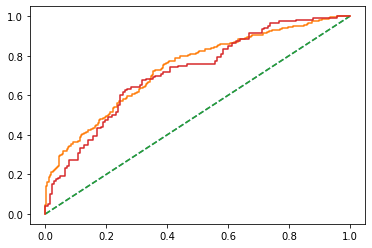

In [86]:
# predict probabilities
ytrain_LR_predict_prob = model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_LR_predict_prob = ytrain_LR_predict_prob[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, ytrain_LR_predict_prob)
print('AUC for the Train Data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, ytrain_LR_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
ytest_LR_predict_prob = model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_LR_predict_prob = ytest_LR_predict_prob[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_LR_predict_prob)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, ytest_LR_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [87]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs', 'newton-cg'],
      'tol':[0.0001,0.00001]}

model_LR = LogisticRegression(max_iter=10000, n_jobs=2)

grid_search = GridSearchCV(estimator=model_LR, param_grid=grid, cv = 3, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

best_model = grid_search.best_estimator_

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [88]:
# Prediction on the training set

ytrain_LR_predict = best_model.predict(X_train)
ytest_LR_predict = best_model.predict(X_test)

## Getting the probabilities on the test set

ytest_LR_predict_prob = best_model.predict_proba(X_test)
pd.DataFrame(ytest_LR_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


Confusion matrix on the training data
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Confusion matrix on the testing data
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



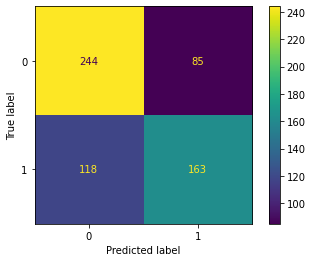

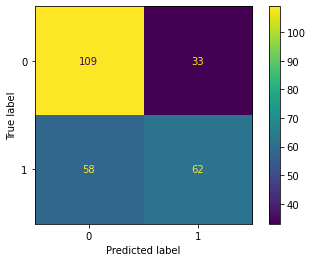

In [89]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model, X_train, y_train)
print('Confusion matrix on the training data')
print(classification_report(y_train, ytrain_LR_predict),'\n');

## Confusion matrix on the test data

plot_confusion_matrix(best_model, X_test, y_test)
print('Confusion matrix on the testing data')
print(classification_report(y_test, ytest_LR_predict),'\n');

LDA

In [90]:
#Build LDA Model
clf = LinearDiscriminantAnalysis() # priors=[0.85, 0.15]
model_LDA = clf.fit(X_train, y_train)

# Training Data Class Prediction with a cut-off value of 0.5
ytrain_LDA_predict = model_LDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_LDA_predict = model_LDA.predict(X_test)

Confusion matrix on the training data
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Confusion matrix on the testing data
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



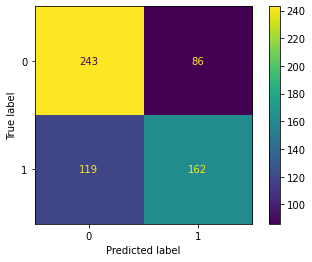

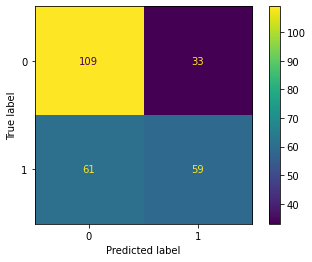

In [91]:
## Confusion matrix on the training data

plot_confusion_matrix(model_LDA, X_train, y_train)
print('Confusion matrix on the training data')
print(classification_report(y_train, ytrain_LDA_predict),'\n');

## Confusion matrix on the test data

plot_confusion_matrix(model_LDA, X_test, y_test)
print('Confusion matrix on the testing data')
print(classification_report(y_test, ytest_LDA_predict),'\n');

In [92]:
# Training Data Probability Prediction
ytrain_LDA_predict_prob = model_LDA.predict_proba(X_train)

# Test Data Probability Prediction
ytest_LDA_predict_prob = model_LDA.predict_proba(X_test)

# ytrain_LDA_predict_prob[:,1]

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


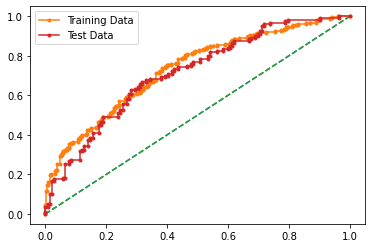

In [93]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train, ytrain_LDA_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, ytrain_LDA_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test, ytest_LDA_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, ytest_LDA_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show();